In [1]:
%load_ext ilsext.magic

In [2]:
from pyeda.inter import *
from itertools import permutations

## Exercise 4.a

Build the OBDD corresponding to the formula

$(a_1 ↔ b_1)∧(a_2 ↔ b_2)∧(a_3 ↔ b_3)$

you should select different variable orderings to experiment the effects on the size of the diagrams.

In [72]:
a = exprvars('x',3)
b = exprvars('x',3)
f1 = And(*[expr("x <=> y") for (x,y) in zip(a,b)])

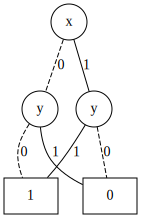

In [73]:
%dotobj expr2bdd(f1)

## Exercise 4.b

In [74]:
f2 = And(*[Or(And(x,y),Nor(x,y)) for (x,y) in zip(map(exprvar,'ac'),map(exprvar,'bd'))])
g2 = expr2bdd(f2)

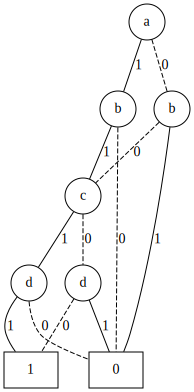

In [75]:
%dotobj g2

## Exercise 4.c

In [66]:
a,b,c,d = map(bddvar,'abcd')
f3 = Or(
       Or(
         Or(
           And(And(And(a,d),c),b),
           And(And(And(c,d),Not(a)),Not(b))
         ),
         And(And(And(a,b),Not(c)),d)
       ),
       And(And(And(Not(c),Not(a)),Not(b)),d)
     )

In [76]:
f3.equivalent(g2)

True

## Exercise 4.d

# Exercise 5

In [105]:
G = bddvars('x',7,7)
V = list(range(1,8))
E = [(1,2),(1,3),(1,4),(1,5),
     (2,3),(2,4),(2,6),(3,4),
     (4,5),(4,6),(4,7),(5,7)]
source = bddvars('a', len(V) + 1)
target = bddvars('b', len(V) + 1)

First, draw the decision tree corresponding to the binary relation.

In [115]:
def buildBDT(vs, es):
  """Builder for the Binary Decision Tree, representing the directed edges of a digraph.
  
  :param vs: number of vertexes in the graph (labelled from 1 to vs)
  :param es: list of tuples of the form (source, target), with source, target numbers from 1 to vs.
  :returns: an expression, representing the BDT of the graph.
  """
  tree = 0
  for i in reversed(vs):
    success = 0
    adj = [t if s == i else 0 for s, t in es]
    adj.reverse()
    for b in adj:
      success = ite(target[b], 1 if b != 0 else 0, success)
    tree = ite(source[i], success, tree)
  return tree

Then, reduce the tree as an OBDD.

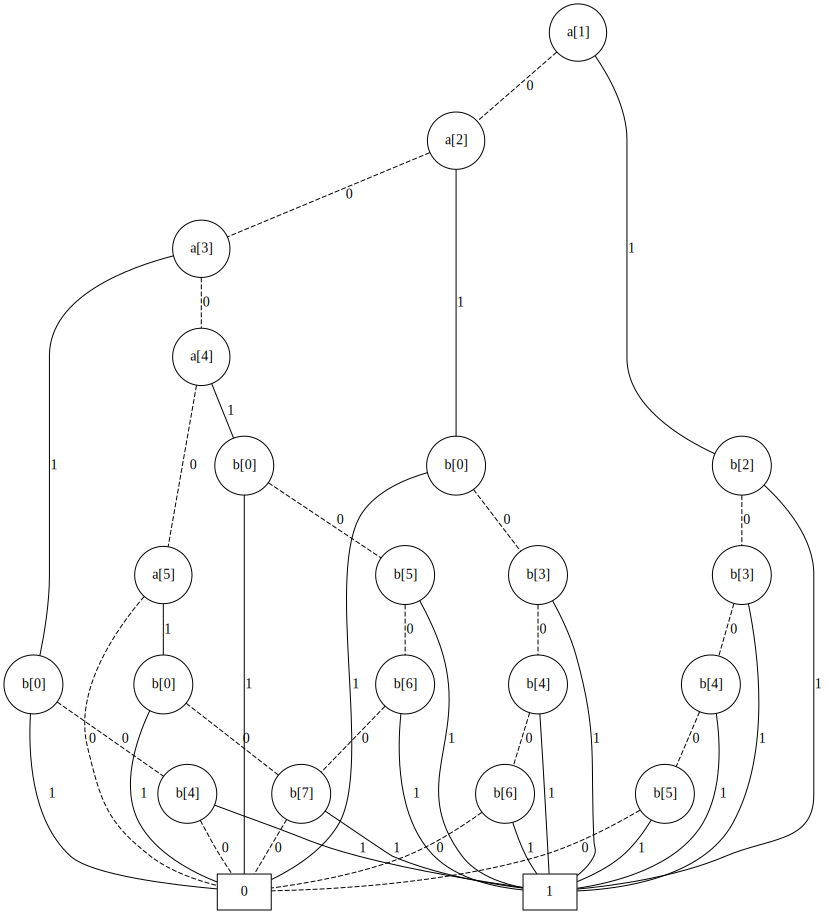

In [116]:
T = buildBDT(V,E)
%dotobj T

Finally, generates the corresponding propositional formula from the OBDD.

In [ ]:
f = bdd2expr(T)
print(f)